In [1]:
%matplotlib inline

In [2]:
# step 1. initialize

import os.path
from tramway.helper import *
import time

## script main parameters ##

trajectory_file = 'glycine_receptor.trxyt'
tessellation_method = 'kmeans'
# average number of locations per cell
location_count = 500
# minimum number of locations per cell
min_location_count = 50

############################

rwa_file = os.path.splitext(trajectory_file)[0]+'.rwa'
mesh_label = '{}_{:d}_min_{:d}'.format(tessellation_method, location_count, min_location_count)


In [3]:
# step 2.a. tessellate
# note: choose either 2.a. or 2.b.; run this cell if the .rwa file does not exist or is to be overwritten

if os.path.exists(rwa_file):
    print('file {} will be overwritten'.format(rwa_file))
_ = tessellate(trajectory_file, tessellation_method,
    avg_location_count=location_count, strict_min_location_count=min_location_count,
    output_file=rwa_file, output_label=mesh_label, force=True)


file glycine_receptor.rwa will be overwritten


In [ ]:
# step 2.b. tessellate
# note: choose either 2.a. or 2.b.; run this cell if the .rwa file already exists and a new mesh is to be added

_ = tessellate(rwa_file, tessellation_method,
    avg_location_count=location_count, strict_min_location_count=min_location_count,
    output_label=mesh_label)


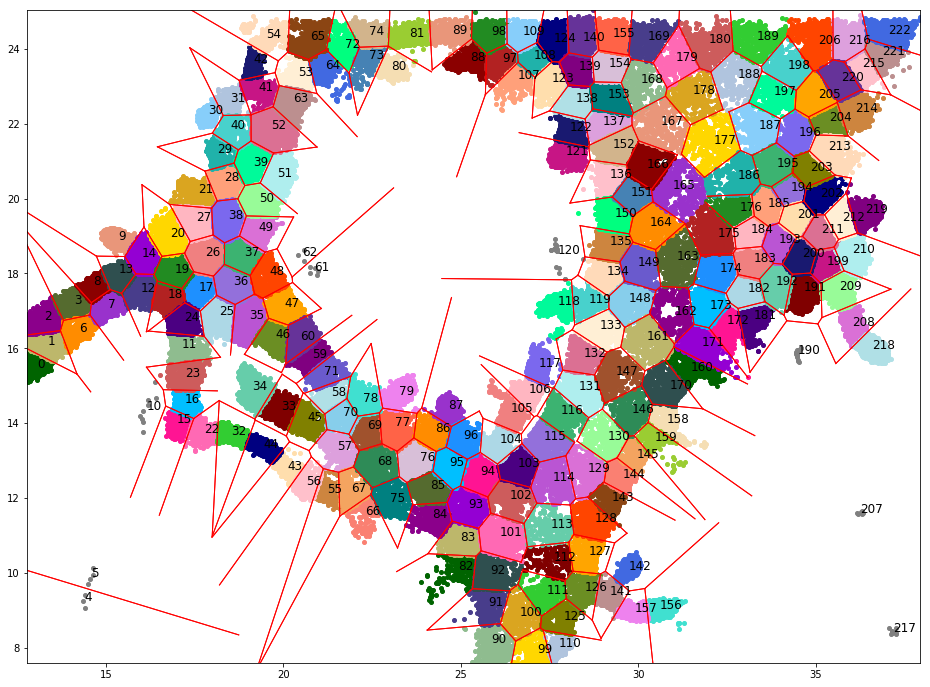

In [4]:
# step 3. plot the mesh
cell_plot(rwa_file, label=mesh_label, cell_indices=True, figsize=(16,12))

# notes: grey points pertain to cells that will be ignored in the inference;
#        red edges denote adjacency;
#        some edges at the border may miss in the figure because of their open end (not a defined point)

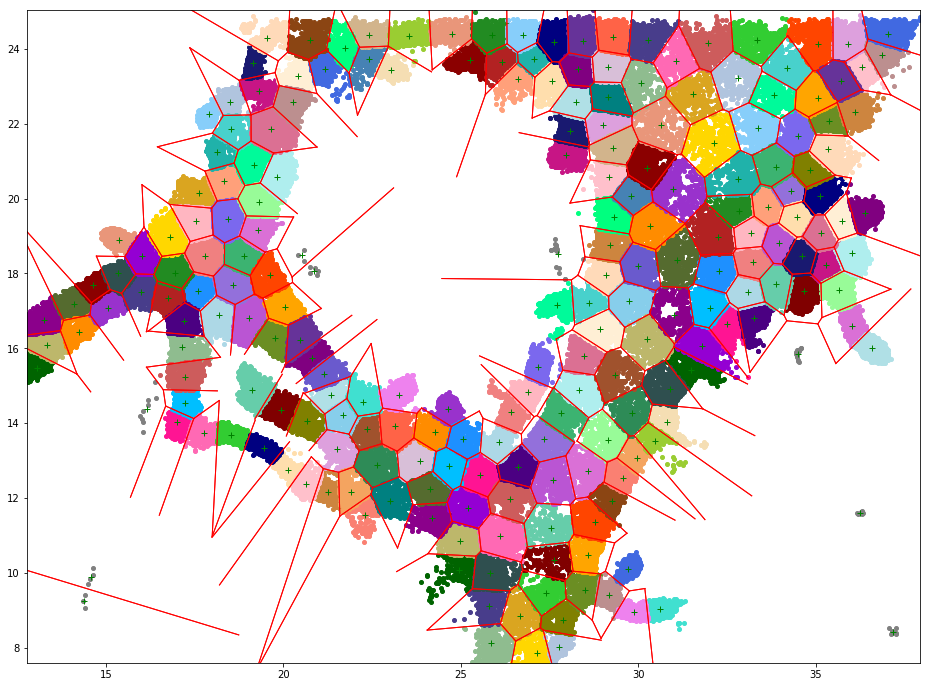

In [5]:
# step 4. edit the mesh

# load the mesh
analysis_tree = load_rwa(rwa_file)
mesh = analysis_tree[mesh_label].data.tessellation

# connect some cells
mesh.set_adjacency( 92, 112, True)
mesh.set_adjacency(165, 167, True)
mesh.set_adjacency(165, 175, True)
mesh.set_adjacency(165, 176, True)
mesh.set_adjacency(165, 186, True)
mesh.set_adjacency(177, 188, True)

# disconnect some other cells
mesh.set_adjacency( 8,  9, False)
mesh.set_adjacency(32, 33, False)
mesh.set_adjacency(32, 34, False)
mesh.set_adjacency(33, 44, False)
mesh.set_adjacency(33, 59, False)
mesh.set_adjacency(33, 71, False)
mesh.set_adjacency(34, 46, False)
mesh.set_adjacency(43, 45, False)
mesh.set_adjacency(43, 57, False)
mesh.set_adjacency(44, 45, False)
mesh.set_adjacency(79, 87, False)
mesh.set_adjacency(142,156,False)
# ...

# save and plot
#save_rwa(rwa_file, analysis_tree, force=True)
cell_plot(analysis_tree, label=segmentation_label, figsize=figsize)
